In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('fetal_health.csv')
print("\033[92m\t\t\t\t\tBOŞLUK VAR MI?\033[0m")
df.isnull().sum()


					BOŞLUK VAR MI?


,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


In [ ]:
# Sütun İsimlerini Türkçeleştirme ve Anlaşılır Hale Getirme
# ---------------------------------------------------------

# Orijinal isimleri Türkçe karşılıklarıyla eşleştiren bir sözlük oluşturuyoruz.
# Bu kısmı sunumda "Veri setini daha anlaşılır kılmak için terimleri Türkçeleştirdik" diyerek anlatabilirsin.

column_mapping = {
    'baseline value': 'Temel Kalp Hızı (Baseline)',
    'accelerations': 'Hızlanmalar (Accelerations)',
    'fetal_movement': 'Bebek Hareketleri',
    'uterine_contractions': 'Rahim Kasılmaları',
    'light_decelerations': 'Hafif Yavaşlamalar',
    'severe_decelerations': 'Şiddetli Yavaşlamalar',
    'prolongued_decelerations': 'Uzun Süreli Yavaşlamalar',
    'abnormal_short_term_variability': 'Anormal Kısa Dönem Değişkenlik',
    'mean_value_of_short_term_variability': 'Ortalama Kısa Dönem Değişkenlik',
    'percentage_of_time_with_abnormal_long_term_variability': 'Anormal Uzun Dönem Değişkenlik Süresi (%)',
    'mean_value_of_long_term_variability': 'Ortalama Uzun Dönem Değişkenlik',
    'histogram_width': 'Histogram Genişliği',
    'histogram_min': 'Histogram Min',
    'histogram_max': 'Histogram Max',
    'histogram_number_of_peaks': 'Tepe Noktası Sayısı',
    'histogram_number_of_zeroes': 'Sıfır Sayısı',
    'histogram_mode': 'Histogram Mod',
    'histogram_mean': 'Histogram Ortalama',
    'histogram_median': 'Histogram Medyan',
    'histogram_variance': 'Histogram Varyans',
    'histogram_tendency': 'Histogram Eğilimi',
    'fetal_health': 'Bebek Sağlık Durumu' # Hedef Değişken
}

# Sütun isimlerini değiştiriyoruz
df.rename(columns=column_mapping, inplace=True)

# Kontrol edelim
print("Yeni Sütun İsimleri:")
print(df.columns)

Yeni Sütun İsimleri:
Index(['Temel Kalp Hızı (Baseline)', 'Hızlanmalar (Accelerations)',
       'Bebek Hareketleri', 'Rahim Kasılmaları', 'Hafif Yavaşlamalar',
       'Şiddetli Yavaşlamalar', 'Uzun Süreli Yavaşlamalar',
       'Anormal Kısa Dönem Değişkenlik', 'Ortalama Kısa Dönem Değişkenlik',
       'Anormal Uzun Dönem Değişkenlik Süresi (%)',
       'Ortalama Uzun Dönem Değişkenlik', 'Histogram Genişliği',
       'Histogram Min', 'Histogram Max', 'Tepe Noktası Sayısı', 'Sıfır Sayısı',
       'Histogram Mod', 'Histogram Ortalama', 'Histogram Medyan',
       'Histogram Varyans', 'Histogram Eğilimi', 'Bebek Sağlık Durumu'],
      dtype='object')


In [ ]:
print("\033[91m\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tİLK 5 SATIR\033[0m")
df.head()

																									İLK 5 SATIR


,Temel Kalp Hızı (Baseline),Hızlanmalar (Accelerations),Bebek Hareketleri,Rahim Kasılmaları,Hafif Yavaşlamalar,Şiddetli Yavaşlamalar,Uzun Süreli Yavaşlamalar,Anormal Kısa Dönem Değişkenlik,Ortalama Kısa Dönem Değişkenlik,Anormal Uzun Dönem Değişkenlik Süresi (%),...,Histogram Min,Histogram Max,Tepe Noktası Sayısı,Sıfır Sayısı,Histogram Mod,Histogram Ortalama,Histogram Medyan,Histogram Varyans,Histogram Eğilimi,Bebek Sağlık Durumu
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
print("\033[94m\t\t\t\tVERİ SETİ BİLGİSİ\033[0m")
df.info()

				VERİ SETİ BİLGİSİ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Temel Kalp Hızı (Baseline)                 2126 non-null   float64
 1   Hızlanmalar (Accelerations)                2126 non-null   float64
 2   Bebek Hareketleri                          2126 non-null   float64
 3   Rahim Kasılmaları                          2126 non-null   float64
 4   Hafif Yavaşlamalar                         2126 non-null   float64
 5   Şiddetli Yavaşlamalar                      2126 non-null   float64
 6   Uzun Süreli Yavaşlamalar                   2126 non-null   float64
 7   Anormal Kısa Dönem Değişkenlik             2126 non-null   float64
 8   Ortalama Kısa Dönem Değişkenlik            2126 non-null   float64
 9   Anormal Uzun Dönem Değişkenlik Süresi (%)  2126 non-null   float64
 10  Or

/tmp/ipython-input-2856036974.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Bebek Sağlık Durumu', data=df, palette='viridis')



Sağlıklı, Riskli ve Hasta Bebek Sayıları: 
 Bebek Sağlık Durumu
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


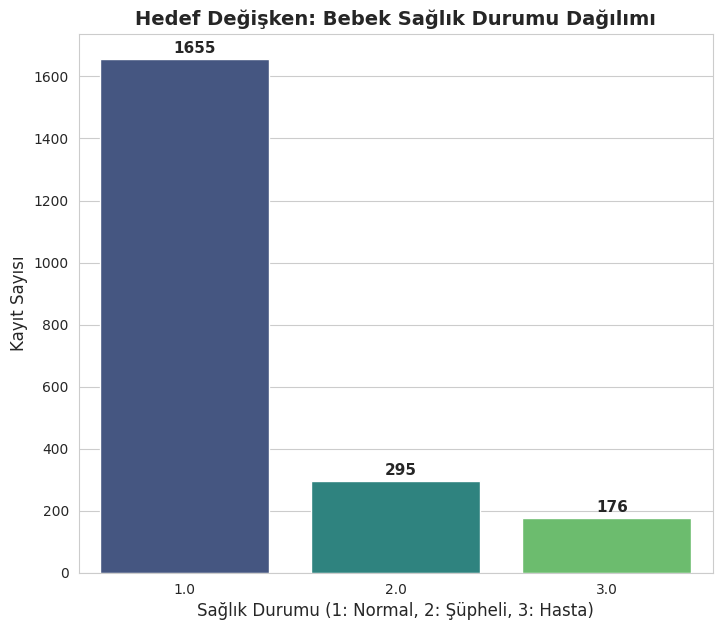

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Görselleştirme ayarları
sns.set_style("whitegrid")
plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)

ax = sns.countplot(x='Bebek Sağlık Durumu', data=df, palette='viridis')
plt.title('Hedef Değişken: Bebek Sağlık Durumu Dağılımı', fontsize=14, fontweight='bold')
plt.xlabel('Sağlık Durumu (1: Normal, 2: Şüpheli, 3: Hasta)', fontsize=12)
plt.ylabel('Kayıt Sayısı', fontsize=12)

# Çubukların üzerine sayıları yazdırma
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.35, p.get_height() + 20), fontsize=11, fontweight='bold')

# Konsola sayıları yazdırma
target_column = 'Bebek Sağlık Durumu'
print("\nSağlıklı, Riskli ve Hasta Bebek Sayıları: \n", df[target_column].value_counts())

plt.show()

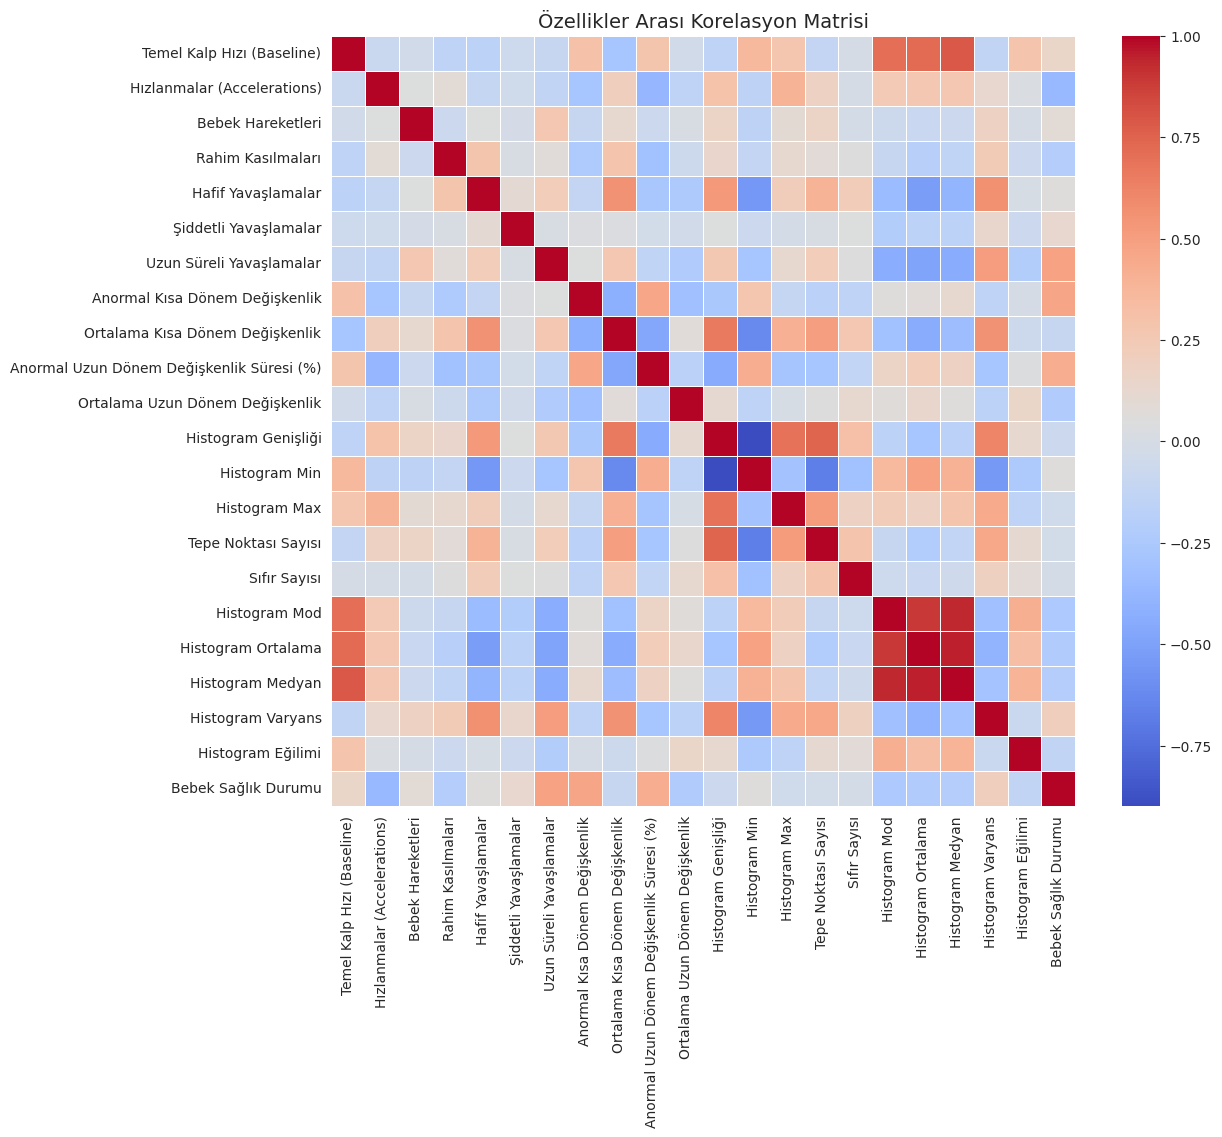

Hedef Değişken (fetal_health) ile En Yüksek Korelasyonlar:
Bebek Sağlık Durumu                          1.000000
Uzun Süreli Yavaşlamalar                     0.484859
Anormal Kısa Dönem Değişkenlik               0.471191
Anormal Uzun Dönem Değişkenlik Süresi (%)    0.426146
Histogram Varyans                            0.206630
Name: Bebek Sağlık Durumu, dtype: float64


In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Özellikler Arası Korelasyon Matrisi', fontsize=14)
plt.show()
print("Hedef Değişken (fetal_health) ile En Yüksek Korelasyonlar:")
print(corr_matrix['Bebek Sağlık Durumu'].sort_values(ascending=False).head(5))


# GRAFİKTEN ÇIKARILACAK ANLAM

> **Aşırı Kırmızı Noktalar (=Güçlü Pozitif İlişki)**
- Bu özellik arttıkça, bebeğin hastalık taşıma riski artar.
- Örnek: prolongued_decelerations (kalp yavaşlaması) artarsa fetal_health numarası da büyür (1'den 3'e gider, yani hasta olur).

> **Aşırı Mavi Noktalar (=Güçlü Negatif İlişki)**
- Bu özellik arttıkça, bebeğin hastalık taşıma riski azalır.
- Örnek: accelerations (kalp hızlanması) genelde sağlıklı bebeklerde olur. Bu artarsa fetal_health sayısı küçülür (3'ten 1'e, yani normale döner).

> **Açık Renkli Noktalr (=İlişki Yok/ Az)**
- Bu özelliğin değişmesi bebeğin sağlığını etkilemiyor.


In [ ]:
# Hedef değişkenimiz (Tahmin etmeye çalıştığımız sütun)
y = df['Bebek Sağlık Durumu']

# Özellikler (Hedef sütun hariç geriye kalan her şey)
X = df.drop('Bebek Sağlık Durumu', axis=1)

# TRAIN - TEST SPLIT (%80 Eğitim, %20 Test)

# stratify=y parametresi çok önemlidir.
# Bu sayede Eğitim ve Test setlerinde "Hasta" bebek oranının eşit olmasını sağlarız.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Eğitim Seti Boyutu: {X_train.shape}")
print(f"Test Seti Boyutu:   {X_test.shape}")

 # NORMALİZASYON (STANDARD SCALER)
scaler = StandardScaler()

# DİKKAT: Scaler'a sadece X_train'i gösteriyoruz (Öğreniyor)
X_train_scaled = scaler.fit_transform(X_train)

# X_test'i sadece dönüştürüyoruz (Kopyalıyor, öğrenmiyor)
X_test_scaled = scaler.transform(X_test)

# Sonuçları DataFrame'e çevirelim ki tablo olarak görebilelim (İsteğe bağlı, güzel görünür)
# Sütun isimlerini kaybetmemek için X.columns kullanıyoruz
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nNormalizasyon tamamlandı. Veriler standartlaştırıldı.")
print("Örnek (İlk 5 satır - Eğitim Verisi):")
print(X_train_scaled.head())

Eğitim Seti Boyutu: (1700, 21)
Test Seti Boyutu:   (426, 21)

Normalizasyon tamamlandı. Veriler standartlaştırıldı.
Örnek (İlk 5 satır - Eğitim Verisi):
   Temel Kalp Hızı (Baseline)  Hızlanmalar (Accelerations)  Bebek Hareketleri  \
0                   -0.008843                    -0.830107          -0.207114   
1                    1.320678                     0.728349          -0.207114   
2                   -0.417927                    -0.830107          -0.186266   
3                    0.093427                     1.247835          -0.186266   
4                   -0.827010                    -0.830107          -0.102876   

   Rahim Kasılmaları  Hafif Yavaşlamalar  Şiddetli Yavaşlamalar  \
0           2.612445           -0.293069              -0.054313   
1          -0.465754           -0.635958              -0.054313   
2           0.902335            1.421376              -0.054313   
3           1.928401            1.421376              -0.054313   
4          -1.149798     

**Eğitim ve Test Ayrımı (%80 - %20)**

- Olay: Veri setini %80 modelin ders çalışması (Train), %20 sınava girmesi (Test) için ikiye böldük.

- Örnek: 2126 satırlık verinin 1700 tanesiyle modeli eğittik, kalan 426 tanesiyle başarısını ölçtük.

- Neden Kullanılıyor: Modelin ezber yapıp yapmadığını (Overfitting) anlamak ve hiç görmediği verilerdeki gerçek performansını ölçmek için.

**Stratify (Katmanlı Örnekleme)**

- Olay: Ayrım yaparken sınıfların (Normal, Şüpheli, Hasta) oranlarını koruduk.

- Örnek: Verinin tamamında %78 "Normal" bebek varsa, Eğitim ve Test setlerinde de bu oran %78 olarak kaldı.

- Neden Kullanılıyor: Test setine tesadüfen sadece sağlıklı bebeklerin düşmesini engelleyip, modelin her durumu eşit şartlarda öğrenmesini sağlamak için.

**Standardizasyon (StandardScaler)**

- Olay: Farklı birimlerdeki (nabız, saniye, yüzde) verileri matematiksel olarak aynı hizaya getirdik.

- Örnek: 140 bpm olan kalp atışı ile 0.003 olan hızlanma verisini, ortalaması 0 olacak şekilde dönüştürdük.

- Neden Kullanılıyor: Büyük sayılı özelliklerin (örn. Histogram Genişliği) küçük sayılı ama önemli özellikleri (örn. Hızlanmalar) ezmesini engellemek ve modelin tarafsız karar vermesini sağlamak için.

**Data Leakage (Veri Sızıntısı) Önlemi**

- Olay: Standardizasyon işlemini, veriyi ayırdıktan sonra yaptık ve sadece Eğitim setine göre ayarladık.

- Örnek: Scaler, Test setindeki verileri hiç görmeden (kopya çekmeden) dönüştürme işlemini yaptı.

- Neden Kullanılıyor: Modelin test verisindeki istatistikleri önceden öğrenip haksız yere yüksek başarı puanı almasını (kopya çekmesini) engellemek için.

					MODEL 1: K-EN YAKIN KOMŞU (KNN)
KNN Doğruluk (Accuracy): %87.09

Sınıflandırma Raporu:

              precision    recall  f1-score   support

      Normal       0.90      0.96      0.93       332
     Şüpheli       0.61      0.47      0.53        59
       Hasta       0.88      0.66      0.75        35

    accuracy                           0.87       426
   macro avg       0.80      0.70      0.74       426
weighted avg       0.86      0.87      0.86       426



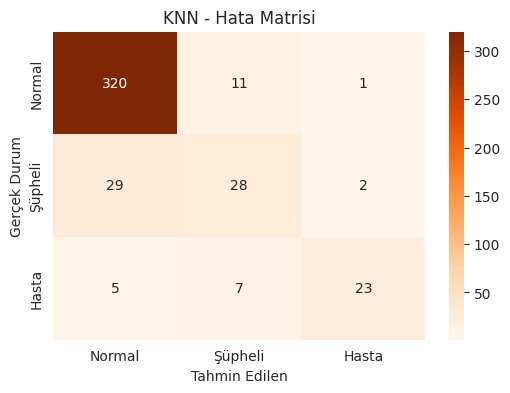

In [ ]:
print("\033[91m\t\t\t\t\tMODEL 1: K-EN YAKIN KOMŞU (KNN)\033[0m")

# Modeli oluşturuyoruz
# n_neighbors=5: En yakın 5 komşuya bakarak karar ver demek (Genelde en iyi başlangıçtır).
knn_model = KNeighborsClassifier(n_neighbors=5)

# Eğitiyoruz
knn_model.fit(X_train_scaled, y_train)

# Tahmin Yapıyoruz
y_pred_knn = knn_model.predict(X_test_scaled)

# Sonuçları Yazdırıyoruz
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Doğruluk (Accuracy): %{acc_knn * 100:.2f}")
print("\nSınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred_knn, target_names=['Normal', 'Şüpheli', 'Hasta']))

# Confusion Matrix Çizimi
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Normal', 'Şüpheli', 'Hasta'],
            yticklabels=['Normal', 'Şüpheli', 'Hasta'])
plt.title('KNN - Hata Matrisi')
plt.ylabel('Gerçek Durum')
plt.xlabel('Tahmin Edilen')
plt.show()

1. MODEL: K-EN YAKIN KOMŞU (KNN) SONUÇLARI
Genel Başarı (Accuracy): %87.09

Hasta Sınıfı (3.0) Performansı:

- Gerçek Hasta Sayısı: 35

- Doğru Tespit Edilen (Yakalanan): 23

- Gözden Kaçan (Yanlışlıkla Sağlıklı/Şüpheli Denilen): 12

Yorum: KNN algoritması, bu veri setinde Lojistik Regresyon ile benzer bir performans gösterdi ancak Karar Ağacı'nın gerisinde kaldı. Hasta sınıfındaki başarı oranı Lojistik Regresyon ile aynı seviyede (23 doğru tespit) kaldı.

				MODEL 2: LOJİSTİK REGRESYON
Lojistik Regresyon Doğruluk (Accuracy): %88.50

Sınıflandırma Raporu:

              precision    recall  f1-score   support

      Normal       0.94      0.95      0.94       332
     Şüpheli       0.61      0.68      0.64        59
       Hasta       0.88      0.66      0.75        35

    accuracy                           0.88       426
   macro avg       0.81      0.76      0.78       426
weighted avg       0.89      0.88      0.89       426



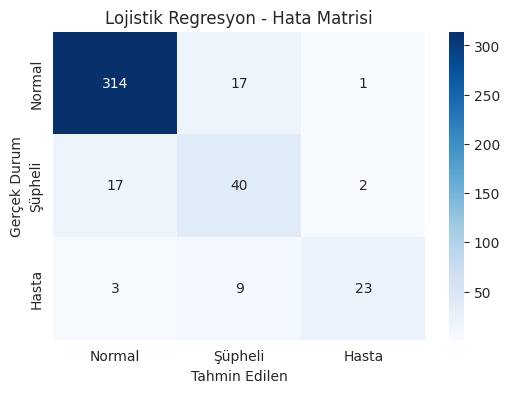

In [ ]:
print("\033[94m\t\t\t\tMODEL 2: LOJİSTİK REGRESYON\033[0m")

# Modeli oluşturuyoruz
log_model = LogisticRegression(random_state=42)

# Eğitiyoruz (Ders Çalışıyor)
log_model.fit(X_train_scaled, y_train)

# Tahmin Yapıyoruz (Sınava Giriyor)
y_pred_log = log_model.predict(X_test_scaled)

# Sonuçları Yazdırıyoruz
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Lojistik Regresyon Doğruluk (Accuracy): %{acc_log * 100:.2f}")
print("\nSınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred_log, target_names=['Normal', 'Şüpheli', 'Hasta']))

# Confusion Matrix Çizimi
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Şüpheli', 'Hasta'],
            yticklabels=['Normal', 'Şüpheli', 'Hasta'])
plt.title('Lojistik Regresyon - Hata Matrisi')
plt.ylabel('Gerçek Durum')
plt.xlabel('Tahmin Edilen')
plt.show()

2. MODEL: LOJİSTİK REGRESYON SONUÇLARI
Genel Başarı (Accuracy): % 88.50

Hasta Sınıfı (3.0) Performansı:

- Gerçek Hasta Sayısı: 35

- Doğru Tespit Edilen (Yakalanan): 23

- Gözden Kaçan (Yanlışlıkla Sağlıklı/Şüpheli Denilen): 12

Yorum: Lojistik Regresyon, karmaşık veri yapısında sınırları ayırmakta zorlanmış görünüyor. Hasta bebeklerin yaklaşık 3'te 1'ini (%34) gözden kaçırması, tıbbi bir model için geliştirilmesi gereken bir risktir.

				MODEL 3: KARAR AĞACI (DECISION TREE)
Karar Ağacı Doğruluk (Accuracy): %90.14

Sınıflandırma Raporu:

              precision    recall  f1-score   support

      Normal       0.94      0.95      0.95       332
     Şüpheli       0.73      0.64      0.68        59
       Hasta       0.81      0.83      0.82        35

    accuracy                           0.90       426
   macro avg       0.82      0.81      0.82       426
weighted avg       0.90      0.90      0.90       426



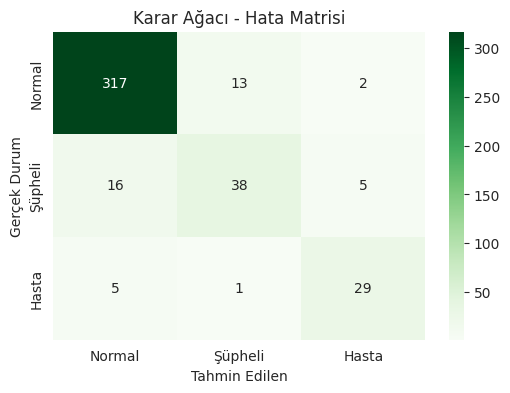

In [ ]:
print("\033[92m\t\t\t\tMODEL 3: KARAR AĞACI (DECISION TREE)\033[0m")

# Modeli oluşturuyoruz
tree_model = DecisionTreeClassifier(random_state=42)

# Eğitiyoruz
tree_model.fit(X_train_scaled, y_train)

# Tahmin Yapıyoruz
y_pred_tree = tree_model.predict(X_test_scaled)

# Sonuçları Yazdırıyoruz
acc_tree = accuracy_score(y_test, y_pred_tree)
print(f"Karar Ağacı Doğruluk (Accuracy): %{acc_tree * 100:.2f}")
print("\nSınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred_tree, target_names=['Normal', 'Şüpheli', 'Hasta']))

# Confusion Matrix Çizimi
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Normal', 'Şüpheli', 'Hasta'],
            yticklabels=['Normal', 'Şüpheli', 'Hasta'])
plt.title('Karar Ağacı - Hata Matrisi')
plt.ylabel('Gerçek Durum')
plt.xlabel('Tahmin Edilen')
plt.show()

3. MODEL: KARAR AĞACI (DECISION TREE) SONUÇLARI
Genel Başarı (Accuracy): % 90.14

Hasta Sınıfı (3.0) Performansı:

- Gerçek Hasta Sayısı: 35

- Doğru Tespit Edilen (Yakalanan): 29

- Gözden Kaçan (Yanlışlıkla Sağlıklı/Şüpheli Denilen): 6

Yorum: Karar Ağacı, Lojistik Regresyon'a göre çok daha başarılı bir performans sergiledi. Hasta bebekleri yakalama sayısı 23'ten 29'a çıktı. Gözden kaçan vaka sayısı 6'ya düştü. Bu model, riskli durumları tespit etmede daha güvenilir.

**Model Eğitimi (Fitting)**

- Olay: Seçtiğimiz algoritmaya (Örn: Lojistik Regresyon) eğitim verilerini vererek, girdiler ile sonuçlar arasındaki ilişkiyi öğrenmesini sağladık.

- Örnek: Model, "Uzun süreli yavaşlama yüksekse -> Bebek Hasta" kuralını bu aşamada öğrendi.

- Neden Kullanılıyor: Bilgisayarın rastgele tahmin yapmak yerine, verideki kalıpları matematiksel olarak kavraması için.

**Tahmin (Prediction)**

- Olay: Eğitilen modele, daha önce hiç görmediği Test verilerini (X_test) gösterip sonuçları tahmin etmesini istedik.

- Örnek: Modele bir hastanın verilerini verdik, o da bize "Bu bebek %90 ihtimalle Şüpheli" dedi.

- Neden Kullanılıyor: Modelin gerçek dünyada (veya sınavda) ne kadar başarılı olacağını simüle etmek için.

**Confusion Matrix (Karmaşıklık Matrisi)**

- Olay: Modelin yaptığı doğru ve yanlış tahminleri bir tablo üzerinde gösterdik.

- Örnek: Tabloda "Gerçekte Hasta olan 10 bebeğe, model yanlışlıkla Normal demiş" bilgisini net bir şekilde gördük.

- Neden Kullanılıyor: Sadece genel başarıya (Accuracy) bakmak yanıltıcı olabilir; modelin hangi hayati hataları yaptığını (Hasta bebeği kaçırmak gibi) detaylı görmek için.

**F1-Score / Recall Metrikleri**

- Olay: Sınıf dengesizliği olduğu için (Normal bebek çok fazla), modelin başarısını daha hassas ölçen puanlara baktık.

- Örnek: Modelimiz sağlıklı bebekleri çok iyi biliyor olabilir ama hasta bebekleri bulma başarısı (Recall) düşükse bu puan bizi uyarır.

- Neden Kullanılıyor: Modelin sadece çoğunluk sınıfı (Normal) ezberleyip yüksek puan almasını (Accuracy tuzağı) engellemek ve "Hasta" sınıfındaki gerçek performansını ölçmek için.